# Structural methods to enhance the resilience of content delivery services to link cut attacks

The code available in this reporitory was presented at the training school of CA15127-RECODIS on Design of Disaster-resilient Communication Networks, hosted in Brussels, Dec. 10-11, 2019.

The course was designed by Marija Furdek and Amaro de Sousa. The code was developed by Carlos Natalino and Igor M. de Araújo.

## Exploring and visualizing the topologies

In [1]:
# imports
import networkx as nx
import networkx.algorithms.centrality as nxcentrality
import numpy as np
import datetime
import math

import matplotlib as mpl
import matplotlib.pyplot as plt

import reader

import sys

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import logging
logging.getLogger('matplotlib').setLevel(logging.FATAL)

from matplotlib import rcParams

In [2]:
# reading general inputs

export_format = 'svg' # you can set the format to pdf, png, eps, etc.

# definition of the topology used
topologies = ['Germany50', 'Coronet']

# definition of the figure sizes
fig_size = {}
fig_size['Coronet'] = (9, 6)
fig_size['Germany50'] = (6, 8)

# reading topology from file
graphs = {}
for topology in topologies:
    graphs[topology] = reader.read_file(f'./topologies/{topology}.txt', topology)

### Plotting original topologies

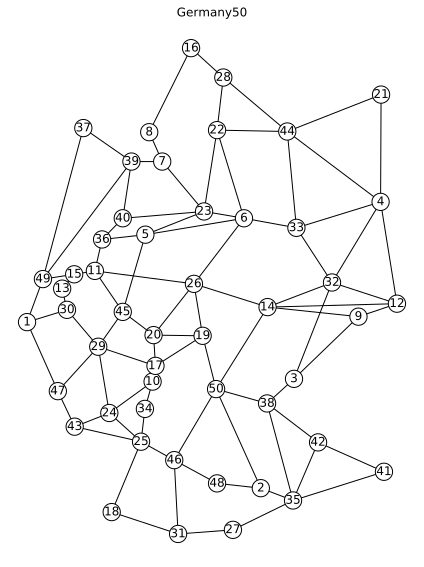

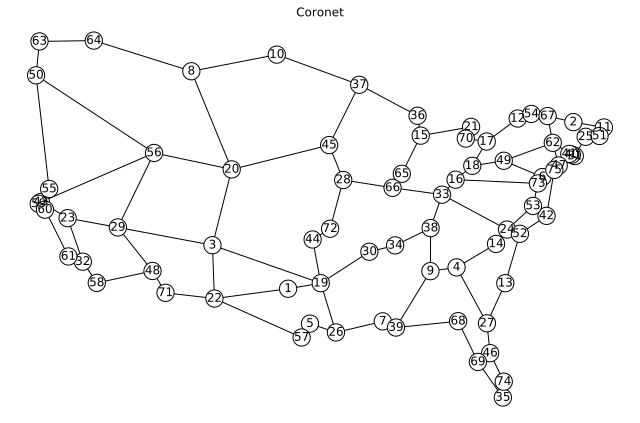

In [3]:
for topology in topologies:
    graph = graphs[topology]
    plt.figure(figsize=fig_size[topology])
    pos = nx.get_node_attributes(graph, 'pos')
    plt.axis('off')
    nx.draw_networkx(graph, pos, node_color='white', edgecolors='black')
    plt.title(topology)
    plt.tight_layout()
#     plt.savefig(f'./results/{topology}.{export_format}') # uncomment to save the figure
    plt.show()
    plt.close()

### Plotting topologies with node names

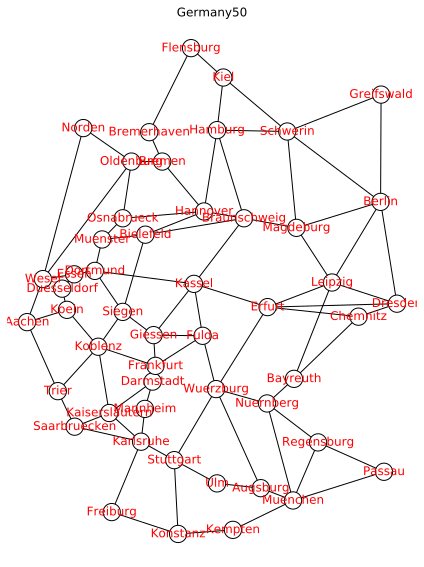

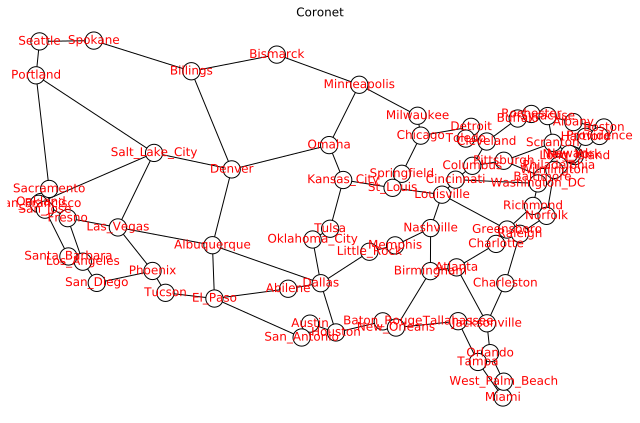

In [4]:
for topology in topologies:
    graph = graphs[topology]
    plt.figure(figsize=fig_size[topology])
    pos = nx.get_node_attributes(graph, 'pos')
    node_names = nx.get_node_attributes(graph, 'name')
    plt.axis('off')
    nx.draw_networkx(graph, pos, labels=node_names, font_color='red', node_color='white', edgecolors='black')
    plt.title(topology)
    plt.tight_layout()
    plt.savefig(f'./figures/{topology}_node_labels.{export_format}') # uncomment to save the figure
    plt.show()
    plt.close()

### Plotting topology with link lengths

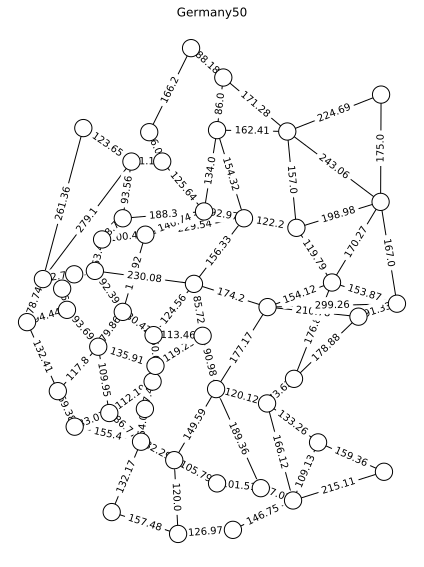

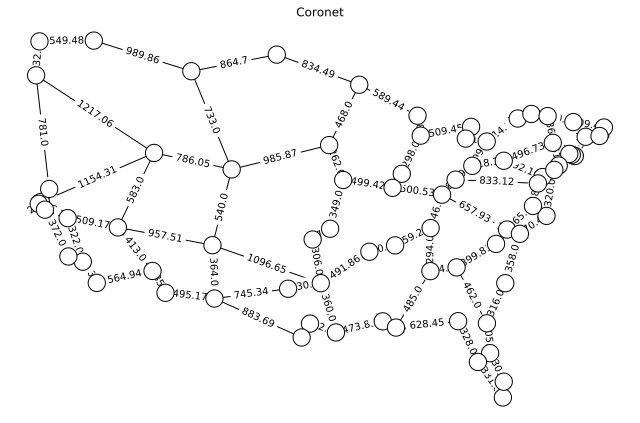

In [5]:
for topology in topologies:
    graph = graphs[topology]
    plt.figure(figsize=fig_size[topology])
    pos = nx.get_node_attributes(graph, 'pos')
    link_length = nx.get_edge_attributes(graph, 'weight')
    plt.axis('off')
    nx.draw_networkx(graph, pos, with_labels=False, node_color='white', edgecolors='black')
    nx.draw_networkx_edge_labels(graph, pos, link_length)
    plt.title(topology)
    plt.tight_layout()
    plt.savefig(f'./figures/{topology}_link_length.{export_format}') # you can set the format to pdf, png, eps, etc.
    plt.show()
    plt.close()

### Plotting node betweenness centrality

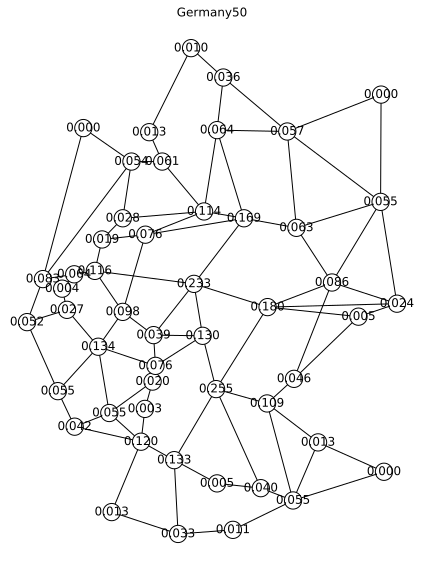

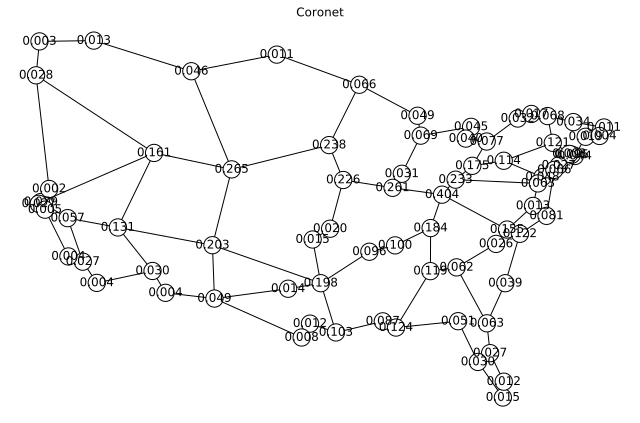

In [6]:
for topology in topologies:
    graph = graphs[topology]
    plt.figure(figsize=fig_size[topology])
    pos = nx.get_node_attributes(graph, 'pos')
    node_betweenness = {key: '{:.3f}'.format(value) for key, value in nxcentrality.betweenness_centrality(graph).items()} # showing only two decimal cases
    plt.axis('off')
    nx.draw_networkx(graph, pos, labels=node_betweenness, node_color='white', edgecolors='black')
    plt.title(topology)
    plt.tight_layout()
    plt.savefig(f'./figures/{topology}_node_betweenness.{export_format}')
    plt.show()
    plt.close()

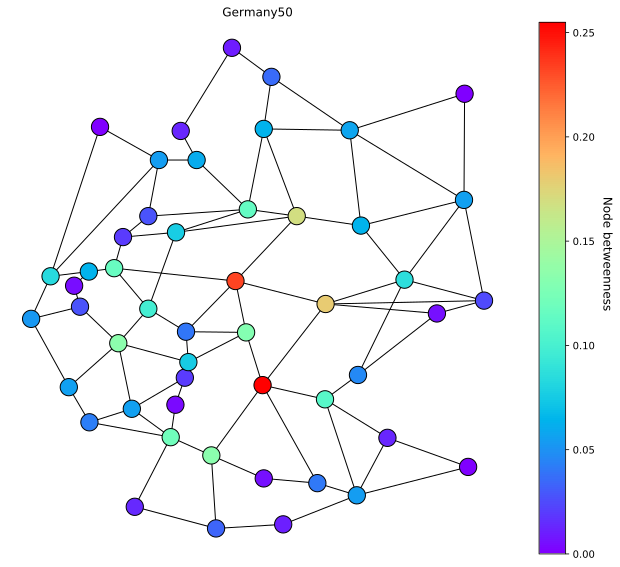

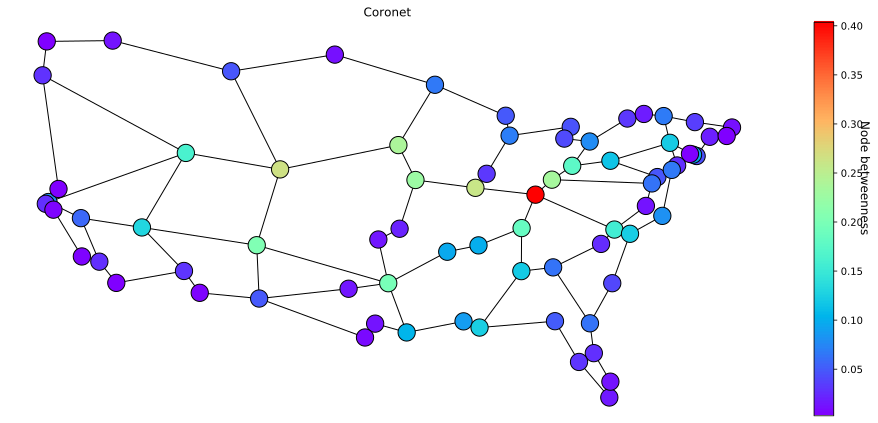

In [7]:
for topology in topologies:
    graph = graphs[topology]

    plt.figure(figsize=[fig_size[topology][0]*1.5, fig_size[topology][1]])
    pos = nx.get_node_attributes(graph, 'pos')
    node_betweenness = nxcentrality.betweenness_centrality(graph)

    # plotting colors
    values = [value for key, value in node_betweenness.items()]
    norm = mpl.colors.Normalize(vmin=min(values), vmax=max(values))
    cmap = mpl.cm.get_cmap('rainbow')

    plt.axis('off')
    nx.draw_networkx_edges(graph, pos)
    nx.draw_networkx_nodes(graph, pos, node_color=[cmap(norm(value)) for key, value in node_betweenness.items()], edgecolors='black')

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    clb = plt.colorbar(sm)
    clb.ax.set_title('Node betweenness', rotation=270, y=.45, x=2.55)
    plt.title(topology)
    plt.tight_layout()
    plt.savefig(f'./figures/{topology}_node_betweenness_color.{export_format}') # you can set the format to pdf, png, eps, etc.
    plt.show()
    plt.close()

### Plot link betweenness centrality

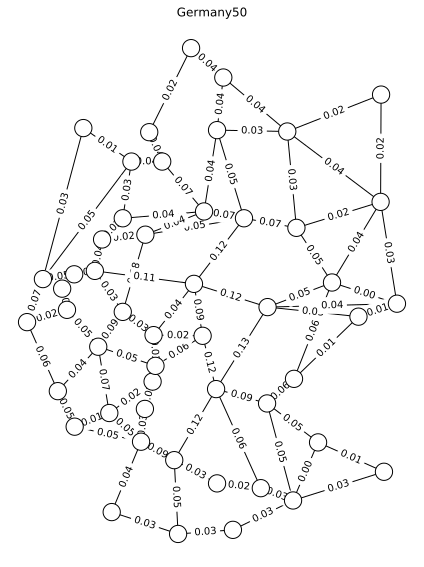

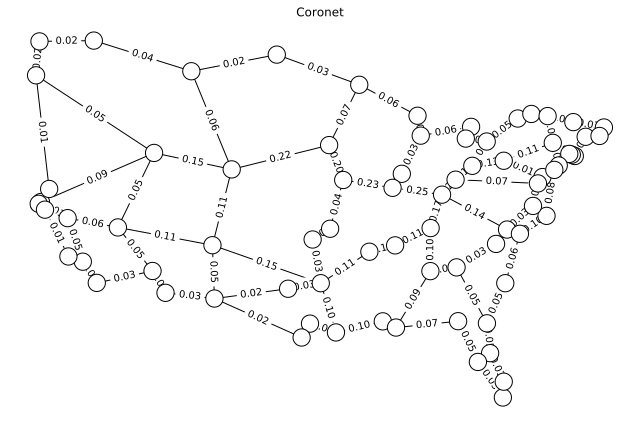

In [8]:
for topology in topologies:
    graph = graphs[topology]
    plt.figure(figsize=fig_size[topology])
    pos = nx.get_node_attributes(graph, 'pos')
    link_betweenness = {key: '{:.2f}'.format(value) for key, value in nxcentrality.edge_betweenness_centrality(graph).items()} # showing only two decimal cases
    plt.axis('off')
    nx.draw_networkx(graph, pos, with_labels=False, node_color='white', edgecolors='black')
    nx.draw_networkx_edge_labels(graph, pos, link_betweenness)
    plt.title(topology)
    plt.tight_layout()
    plt.savefig(f'./figures/{topology}_link_betweenness.{export_format}') # you can set the format to pdf, png, eps, etc.
    plt.show()
    plt.close()

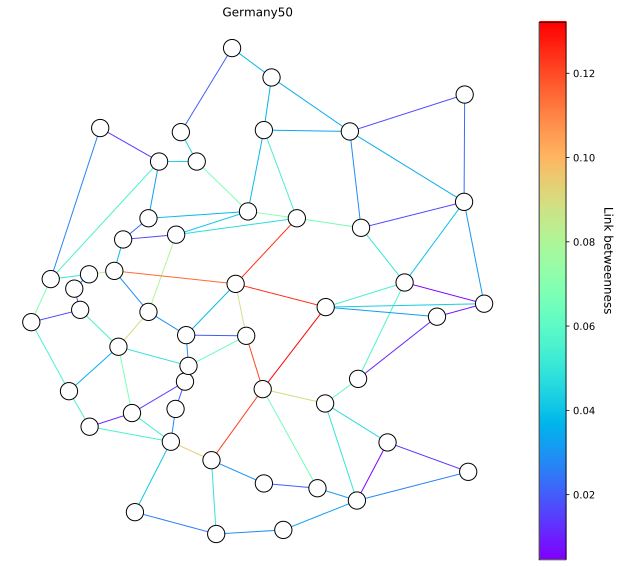

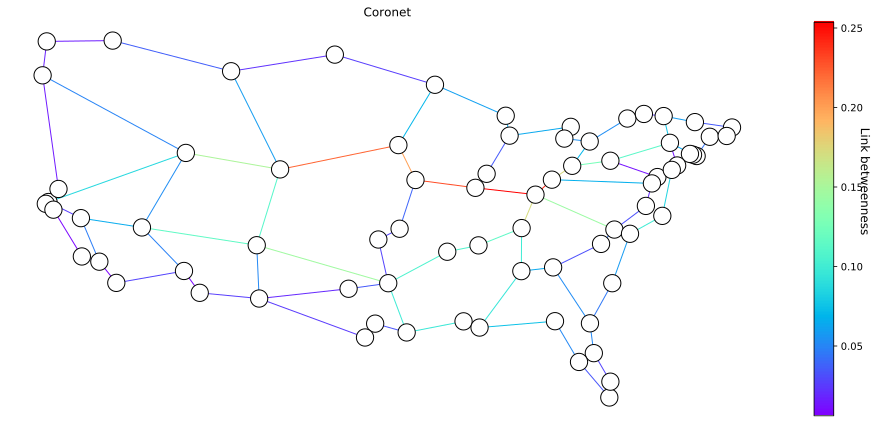

In [10]:
for topology in topologies:
    graph = graphs[topology]
    plt.figure(figsize=[fig_size[topology][0]*1.5, fig_size[topology][1]])
    pos = nx.get_node_attributes(graph, 'pos')
    link_betweenness = nxcentrality.edge_betweenness_centrality(graph)

    # plotting colors
    values = [value for key, value in link_betweenness.items()]
    norm = mpl.colors.Normalize(vmin=min(values), vmax=max(values))
    cmap = mpl.cm.get_cmap('rainbow')

    plt.axis('off')
    nx.draw_networkx_nodes(graph, pos, node_color='white', edgecolors='black')
    nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(), edge_color=[cmap(norm(value)) for key, value in link_betweenness.items()])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    clb = plt.colorbar(sm)
    clb.ax.set_title('Link betweenness', rotation=270, y=.45, x=2.55)
    plt.title(topology)
    plt.tight_layout()
    plt.savefig(f'./figures/{topology}_link_betweenness_color.{export_format}')
    plt.show()
    plt.close()